In [71]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from datasets import Dataset, DatasetDict
from PIL import Image
from huggingface_hub import notebook_login

In [70]:
notebook_login()

NameError: name 'notebook_login' is not defined

In [69]:
ds = load_dataset("imagefolder", data_dir = "./images/")
ds = ds['train']

KeyboardInterrupt: 

In [3]:
data = ds.train_test_split(test_size=0.15)

In [4]:
test = {}
image = []
label = []
with open('./meta/meta/test.txt', 'r') as file:

    for line in file:
        text = line.strip()
        before, after = text.split("/")
        after = "./images/" + before + "/" + after + ".jpg"
        try:
            after = Image.open(after)
            image.append(after)
        finally:
            after.close()
        labels = data['train'].features['label']
        for i in range(101):
            if labels.names[i] == before:
                label.append(i)
    
    test["image"] = image
    test["label"] = label

test

AttributeError: 'str' object has no attribute 'close'

In [5]:
train = {}
image = []
label = []
with open('./meta/meta/train.txt', 'r') as file:

    for line in file:
        text = line.strip()
        before, after = text.split("/")
        after = "./images/" + before + "/" + after + ".jpg"
        try:
            after = Image.open(after)
            image.append(after)
        finally:
            after.close()
        labels = data['train'].features['label']
        for i in range(101):
            if labels.names[i] == before:
                label.append(i)
    
    train["image"] = image
    train["label"] = label

train

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=308x512 at 0x1D650D0EF80>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D650D0C190>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D640CB1420>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D640CB3490>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D640CB0340>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=308x512 at 0x1D6399A6680>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D640CB34F0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D650D68130>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x1D650D68160>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x1D650D682E0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x1D650D68490>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at

In [6]:
train_dataset = Dataset.from_dict(train)
test_dataset = Dataset.from_dict(test)
dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})
train_split = dataset_dict["train"]
test_split = dataset_dict["test"]
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 75750
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 25250
    })
})

In [7]:
ex = train_split[400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x1D650D0FF40>,
 'label': 0}

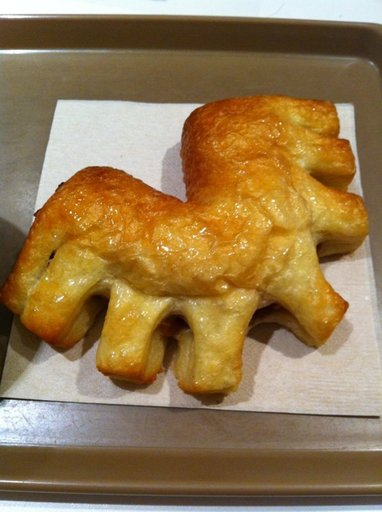

In [8]:
image = ex['image']
image

In [9]:
labels = data['train'].features['label']
labels

ClassLabel(names=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'mac

In [10]:
labels.names[ex['label']]

'apple_pie'

In [47]:
trains = {}
image = []
label = []
with open('./meta/meta/train.txt', 'r') as file:
    x = 0
    for line in file:
        text = line.strip()
        before, after = text.split("/")
        after = "./images/" + before + "/" + after + ".jpg"
        try:
            after = Image.open(after)
            image.append(after)
        finally:
            after.close()
        labels = data['train'].features['label']
        for i in range(101):
            if labels.names[i] == before:
                label.append(i)
        x += 1
        if x == 1100:
            break
    
    trains["image"] = image
    trains["label"] = label

trains

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=308x512 at 0x2AEE6045750>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AEED17F490>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE80165000>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE80165A80>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE8017C280>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=308x512 at 0x2AE8017CD00>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE8017FC40>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE8017DC60>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x2AE8017DF00>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE8017E4A0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x2AE8017D870>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at

In [48]:
tests = {}
image = []
label = []
with open('./meta/meta/test.txt', 'r') as file:
    x = 0
    for line in file:
        text = line.strip()
        before, after = text.split("/")
        after = "./images/" + before + "/" + after + ".jpg"
        try:
            after = Image.open(after)
            image.append(after)
        finally:
            after.close()
        labels = data['train'].features['label']
        for i in range(101):
            if labels.names[i] == before:
                label.append(i)
        x += 1
        if x == 1100:
            break
    
    tests["image"] = image
    tests["label"] = label

tests

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE80637F70>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x2AE80637EE0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x2AE80637CD0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x2AE80637E20>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x342 at 0x2AE80167E50>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE801657B0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x343 at 0x2AE80166A10>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x358 at 0x2AE801646A0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x322 at 0x2AE801649D0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x2AE801655A0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x2AE80165390>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at

In [49]:
train_datasets = Dataset.from_dict(trains)
test_datasets = Dataset.from_dict(tests)
dataset_dicts = DatasetDict({"train": train_datasets, "test": test_datasets})
train_splits = dataset_dicts["train"]
test_splits = dataset_dicts["test"]
dataset_dicts

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1100
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1100
    })
})

In [50]:
train_splits

Dataset({
    features: ['image', 'label'],
    num_rows: 1100
})

In [ ]:
dataset_dicts.push_to_hub("Jacques7103/AI_Test")

In [ ]:
data = load_dataset("rajistics/indian_food_images")

In [51]:
from datasets import load_metric

metric = load_metric("accuracy")

In [52]:
labels = data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

In [53]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

c:\Users\ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [54]:
from torchvision import transforms

def preprocess_image(image, target_size=(224, 224)):
    """Convert PIL image to pixel values using ToTensor transformation."""
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
    ])
    # Convert to RGB if not already in that mode
    if image.mode != 'RGB':
        image = image.convert('RGB')
    # Apply the transformation
    pixel_values = transform(image)
    return pixel_values


def preprocess_train(dataset):
    """Apply train_transforms across a dataset."""
    modified_dataset = []
    for example in dataset:
        example["pixel_values"] = preprocess_image(example["image"])
        modified_dataset.append(example)
    return modified_dataset

In [55]:
train_split = preprocess_train(train_splits)
test_split = preprocess_train(test_splits)

In [56]:
train_split[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=308x512 at 0x2AE80164790>,
 'label': 0,
 'pixel_values': tensor([[[0.2078, 0.2157, 0.2196,  ..., 0.1451, 0.1490, 0.1686],
          [0.1373, 0.1451, 0.1569,  ..., 0.1373, 0.1137, 0.1098],
          [0.1647, 0.1569, 0.1569,  ..., 0.1529, 0.1490, 0.1176],
          ...,
          [0.2118, 0.2078, 0.1961,  ..., 0.1765, 0.1765, 0.1765],
          [0.2157, 0.2471, 0.2667,  ..., 0.1725, 0.1725, 0.1725],
          [0.2471, 0.2627, 0.2706,  ..., 0.1647, 0.1647, 0.1608]],
 
         [[0.2157, 0.2196, 0.2235,  ..., 0.1490, 0.1490, 0.1725],
          [0.1686, 0.1765, 0.1843,  ..., 0.1490, 0.1255, 0.1255],
          [0.2078, 0.2000, 0.1922,  ..., 0.1686, 0.1686, 0.1373],
          ...,
          [0.2314, 0.2157, 0.1882,  ..., 0.1608, 0.1608, 0.1569],
          [0.2353, 0.2471, 0.2431,  ..., 0.1569, 0.1529, 0.1529],
          [0.2667, 0.2667, 0.2392,  ..., 0.1490, 0.1451, 0.1412]],
 
         [[0.1804, 0.1922, 0.2000,  ..., 0.1294, 0.

In [57]:
from transformers import ViTForImageClassification
model_name_or_path = 'google/vit-base-patch16-224-in21k'
model = ViTForImageClassification.from_pretrained(
    model_name_or_path, 
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    'food-recognition',
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  load_best_model_at_end=True,
  hub_strategy="end"
)

In [60]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [61]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [62]:
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_split,
    eval_dataset=test_split,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [63]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

  0%|          | 0/276 [00:00<?, ?it/s]

{'loss': 3.2682, 'learning_rate': 0.0001927536231884058, 'epoch': 0.14}
{'loss': 1.8646, 'learning_rate': 0.0001855072463768116, 'epoch': 0.29}
{'loss': 1.287, 'learning_rate': 0.0001782608695652174, 'epoch': 0.43}
{'loss': 0.9426, 'learning_rate': 0.0001710144927536232, 'epoch': 0.58}
{'loss': 0.7407, 'learning_rate': 0.000163768115942029, 'epoch': 0.72}
{'loss': 0.5816, 'learning_rate': 0.0001565217391304348, 'epoch': 0.87}
{'loss': 0.4059, 'learning_rate': 0.00014927536231884058, 'epoch': 1.01}
{'loss': 0.27, 'learning_rate': 0.00014202898550724638, 'epoch': 1.16}
{'loss': 0.1798, 'learning_rate': 0.0001347826086956522, 'epoch': 1.3}
{'loss': 0.1598, 'learning_rate': 0.00012753623188405797, 'epoch': 1.45}


  0%|          | 0/138 [00:00<?, ?it/s]

{'eval_loss': 4.043280601501465, 'eval_accuracy': 0.44363636363636366, 'eval_runtime': 278.9851, 'eval_samples_per_second': 3.943, 'eval_steps_per_second': 0.495, 'epoch': 1.45}
{'loss': 0.1136, 'learning_rate': 0.00012028985507246378, 'epoch': 1.59}
{'loss': 0.1096, 'learning_rate': 0.00011304347826086956, 'epoch': 1.74}
{'loss': 0.0863, 'learning_rate': 0.00010579710144927538, 'epoch': 1.88}
{'loss': 0.0664, 'learning_rate': 9.855072463768117e-05, 'epoch': 2.03}
{'loss': 0.0865, 'learning_rate': 9.130434782608696e-05, 'epoch': 2.17}
{'loss': 0.0441, 'learning_rate': 8.405797101449276e-05, 'epoch': 2.32}
{'loss': 0.0509, 'learning_rate': 7.681159420289855e-05, 'epoch': 2.46}
{'loss': 0.0412, 'learning_rate': 6.956521739130436e-05, 'epoch': 2.61}
{'loss': 0.0701, 'learning_rate': 6.231884057971015e-05, 'epoch': 2.75}
{'loss': 0.038, 'learning_rate': 5.507246376811594e-05, 'epoch': 2.9}


  0%|          | 0/138 [00:00<?, ?it/s]

{'eval_loss': 4.6229705810546875, 'eval_accuracy': 0.45181818181818184, 'eval_runtime': 289.4417, 'eval_samples_per_second': 3.8, 'eval_steps_per_second': 0.477, 'epoch': 2.9}
{'loss': 0.0318, 'learning_rate': 4.782608695652174e-05, 'epoch': 3.04}
{'loss': 0.0318, 'learning_rate': 4.057971014492754e-05, 'epoch': 3.19}
{'loss': 0.0471, 'learning_rate': 3.3333333333333335e-05, 'epoch': 3.33}
{'loss': 0.028, 'learning_rate': 2.608695652173913e-05, 'epoch': 3.48}
{'loss': 0.0272, 'learning_rate': 1.8840579710144928e-05, 'epoch': 3.62}
{'loss': 0.0266, 'learning_rate': 1.1594202898550725e-05, 'epoch': 3.77}
{'loss': 0.0532, 'learning_rate': 4.347826086956522e-06, 'epoch': 3.91}
{'train_runtime': 3742.8868, 'train_samples_per_second': 1.176, 'train_steps_per_second': 0.074, 'train_loss': 0.386546674683906, 'epoch': 4.0}


model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

events.out.tfevents.1701671528.LAPTOP-PH299HA6.21992.3:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

***** train metrics *****
  epoch                    =        4.0
  train_loss               =     0.3865
  train_runtime            = 1:02:22.88
  train_samples_per_second =      1.176
  train_steps_per_second   =      0.074


In [64]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

  0%|          | 0/138 [00:00<?, ?it/s]

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.4436
  eval_loss               =     4.0433
  eval_runtime            = 0:04:42.02
  eval_samples_per_second =        3.9
  eval_steps_per_second   =      0.489


In [65]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'food-recognition',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

events.out.tfevents.1701675975.LAPTOP-PH299HA6.21992.4:   0%|          | 0.00/363 [00:00<?, ?B/s]

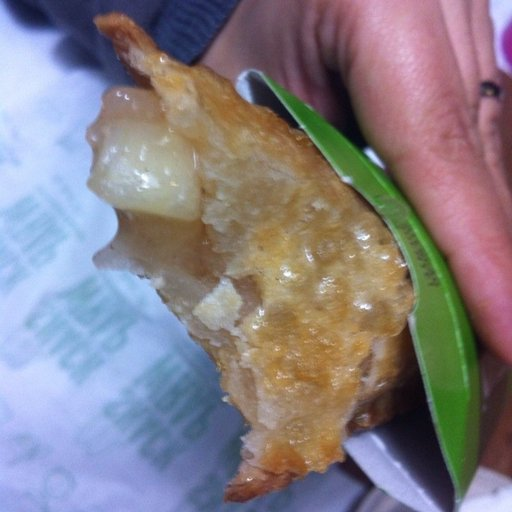

In [66]:
image = test_split[0]['image']
image

In [67]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = "Jacques7103/AI_Test"

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

OSError: ./images/ does not appear to have a file named preprocessor_config.json. Checkout 'https://huggingface.co/./images//None' for available files.

In [40]:
# prepare image for the model
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [41]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [42]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: LABEL_1


In [43]:
from transformers import pipeline
pipe = pipeline("image-classification", "Jacques7103/AI_Test")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
image = test_split[0]['image']

pipe(image)

[{'score': 0.5099830627441406, 'label': 'LABEL_1'},
 {'score': 0.49001699686050415, 'label': 'LABEL_0'}]

In [45]:
pipe = pipeline("image-classification", 
                model=model,
                feature_extractor=feature_extractor)

In [46]:
pipe(image)

[{'score': 0.5255441665649414, 'label': 'LABEL_1'},
 {'score': 0.4744558036327362, 'label': 'LABEL_0'}]